<a href="https://colab.research.google.com/github/bhavya-29/GRIP-TheSparksFoundation/blob/main/Internship%20Sparks%20Foundation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GRIP @ The Sparks Foundation**

**Munagala Bhavya Sri**

**Data Science and Business Analytics Intern**

**Task 1 - Prediction using supervised ML**

The task deals with predicting the percentage of students based on the number of study hours. We will be using simple linear regression to build our model and to make predictions.This is a simple linear regression task as it involves just 2 variables.

**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics  
%matplotlib inline

**Reading data and Displaying**

In [ ]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print(df)
df.head()

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Plotting the distribution of scores**

Plot data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

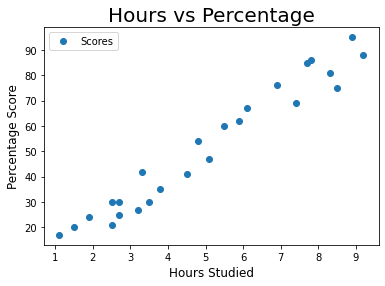

In [ ]:
df.plot(x = 'Hours', y = 'Scores', style = 'o')  

plt.title('Hours vs Percentage',size = 20)
plt.xlabel('Hours Studied', size = 12)
plt.ylabel('Percentage Score', size = 12)

plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

**Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [ ]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

**Training the Algorithm**

We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [7]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [8]:
print('Coefficients: \n', regressor.coef_)

Coefficients: 
 [9.91065648]


**Plotting the regression line**

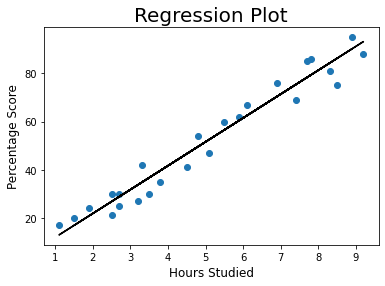

In [9]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.title('Regression Plot',size = 20)
plt.ylabel('Percentage Score', size = 12)
plt.xlabel('Hours Studied', size = 12)
plt.scatter(X, y)
plt.plot(X, line, color = "black");
plt.show()

**Making Predictions**

In [10]:
print(X_test) # Testing data - In Hours

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [11]:
y_pred = regressor.predict(X_test) # Predicting the scores
print('Predicted Values',y_pred)

Predicted Values [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


**Comparing the Actual values to the Predicted values**

In [12]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
print(df1)

   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


**Visualizing Data**

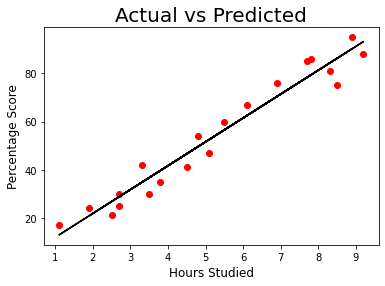

In [13]:
#Visualzing the training set results
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train, regressor.predict(X_train), color = "black")
plt.title('Actual vs Predicted', size = 20)
plt.xlabel('Hours Studied', size = 12)
plt.ylabel('Percentage Score', size = 12)
plt.show()

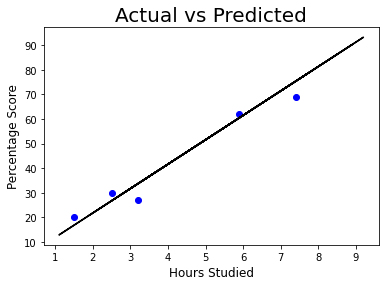

In [14]:
#Visualizing the test set results
plt.scatter(X_test, y_test, color = "blue")
plt.plot(X_train, regressor.predict(X_train), color = "black")
plt.title('Actual vs Predicted', size = 20)
plt.ylabel('Percentage Score', size = 12)
plt.xlabel('Hours Studied', size = 12)
plt.show()

Taking an instance as 9.25 hours of study we predict the percentage he can score.

In [16]:
hours = 9.25
h = np.reshape(hours,[-1,1])
own_pred = regressor.predict(h)

print("No of Hours = {}".format(h))
print("Predicted Score = {}".format(own_pred[0]))
print("According to the regression model if a student studies for 9.25 hours a day he/she is likely to score {0:.2f} marks.".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737539
According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.69 marks.


In [18]:
#The line equation
coefficient = regressor.coef_
intercept = regressor.intercept_

# Since, y = m*x + c
line = (df['Hours'].values * coefficient) + intercept

**Evaluating the model**

In [19]:
#Calculating the Mean Absolute Error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982


In [20]:
print('R-2:', metrics.r2_score(y_test, y_pred))

R-2: 0.9454906892105354
